In [ ]:
'''
Goal is to predict treatment outcomes for brain tumors based on patient data
'''

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import norm
from scipy import stats

In [2]:
training_data=pd.read_csv('BrainTumor.csv')
training_data.info()
training_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient ID                   2000 non-null   int64  
 1   Age                          2000 non-null   int64  
 2   Gender                       2000 non-null   object 
 3   Tumor Type                   2000 non-null   object 
 4   Tumor Grade                  2000 non-null   object 
 5   Tumor Location               2000 non-null   object 
 6   Treatment                    2000 non-null   object 
 7   Treatment Outcome            2000 non-null   object 
 8   Time to Recurrence (months)  1438 non-null   float64
 9   Recurrence Site              1438 non-null   object 
 10  Survival Time (months)       2000 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 172.0+ KB


,Patient ID,Age,Gender,Tumor Type,Tumor Grade,Tumor Location,Treatment,Treatment Outcome,Time to Recurrence (months),Recurrence Site,Survival Time (months)
0,1,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
1,2,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
2,3,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
3,4,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,NaN,NaN,12
4,5,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48
5,6,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
6,7,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
7,8,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
8,9,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation,Complete response,NaN,NaN,12
9,10,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation,Partial response,24.0,Frontal lobe,48


In [3]:
training_data['Tumor Type'].value_counts()

Meningioma      710
Astrocytoma     653
Glioblastoma    637
Name: Tumor Type, dtype: int64

In [4]:
training_data['Tumor Location'].value_counts()

Frontal lobe      515
Parietal lobe     503
Temporal lobe     497
Occipital lobe    485
Name: Tumor Location, dtype: int64

In [5]:
training_data['Treatment'].value_counts()

Surgery + Radiation            882
Surgery + Chemotherapy         779
Surgery                        139
Chemotherapy                   123
Radiation                       73
Surgery + Radiation therapy      2
Chemotherapy + Radiation         2
Name: Treatment, dtype: int64

In [6]:
training_data['Treatment Outcome'].value_counts()

Progressive disease    582
Complete response      561
Stable disease         504
Partial response       353
Name: Treatment Outcome, dtype: int64

In [7]:
'''
dropping patient id, as it's not predictive, and time to recurrence, recurrence site, and survival time
because those are big giveaways to the treatment outcome (at the very least to a complete response). Survival time
is also either to last follow up or to death, and the reason is not specified, so that may confound the outcome as
well.
'''
training_data.drop('Patient ID',axis=1,inplace=True)
training_data.drop('Time to Recurrence (months)',axis=1,inplace=True)
training_data.drop('Recurrence Site',axis=1,inplace=True)
training_data.drop('Survival Time (months)',axis=1,inplace=True)

In [8]:

#label encoding
#le = LabelEncoder()
#training_data['Treatment Outcome'] = le.fit_transform(training_data['Treatment Outcome'])

#one-hot encoding
one_hot_encode_cols=training_data.dtypes[training_data.dtypes==np.object]
one_hot_encode_cols=one_hot_encode_cols.index.tolist()
print(one_hot_encode_cols)
training_data[one_hot_encode_cols].head().T
training_data=pd.get_dummies(training_data,columns=one_hot_encode_cols)


['Gender', 'Tumor Type', 'Tumor Grade', 'Tumor Location', 'Treatment', 'Treatment Outcome']


In [9]:
#scaling
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
#training_data['Treatment Outcome']=mm.fit_transform((training_data['Treatment Outcome'].values).reshape(-1,1))
training_data['Age']=mm.fit_transform((training_data.Age.values).reshape(-1, 1))
round(training_data.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
Age,2000.0,0.472,0.203,0.0,0.3,0.467,0.633,1.0
Gender_Female,2000.0,0.503,0.500,0.0,0.0,1.000,1.000,1.0
Gender_Male,2000.0,0.496,0.500,0.0,0.0,0.000,1.000,1.0
Tumor Type_Astrocytoma,2000.0,0.326,0.469,0.0,0.0,0.000,1.000,1.0
Tumor Type_Glioblastoma,2000.0,0.318,0.466,0.0,0.0,0.000,1.000,1.0
Tumor Type_Meningioma,2000.0,0.355,0.479,0.0,0.0,0.000,1.000,1.0
Tumor Grade_I,2000.0,0.355,0.479,0.0,0.0,0.000,1.000,1.0
Tumor Grade_II,2000.0,0.174,0.380,0.0,0.0,0.000,0.000,1.0
Tumor Grade_III,2000.0,0.153,0.360,0.0,0.0,0.000,0.000,1.0
Tumor Grade_IV,2000.0,0.318,0.466,0.0,0.0,0.000,1.000,1.0


<AxesSubplot:>

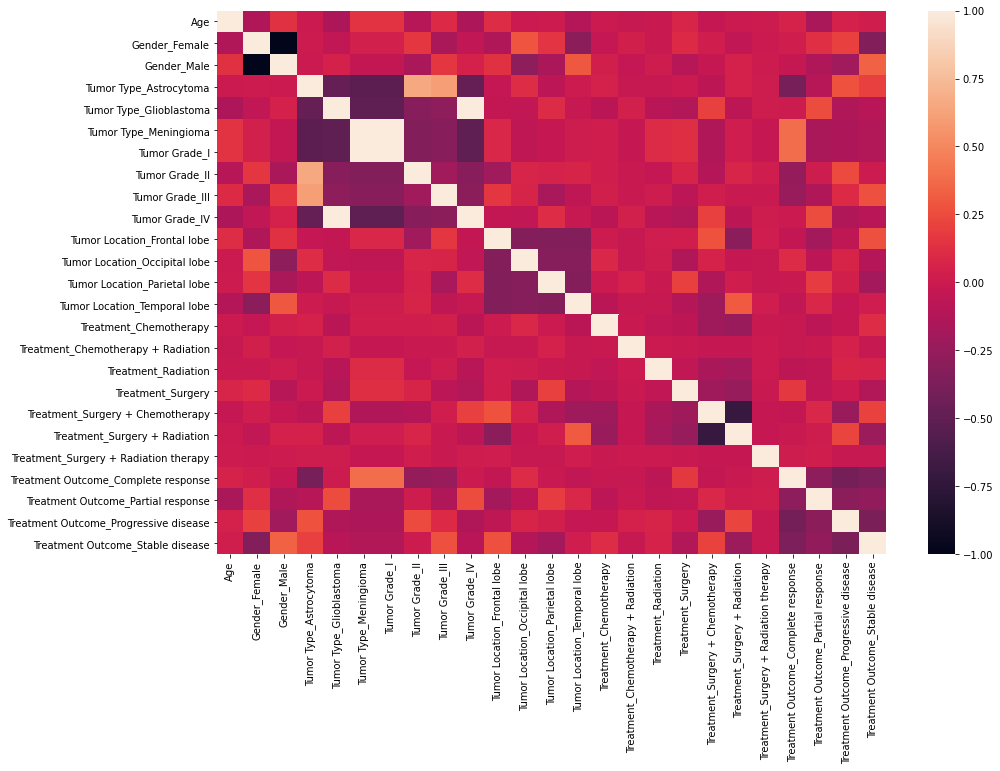

In [18]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(training_data.corr())

In [11]:
#split into test and train sets
from sklearn.model_selection import StratifiedShuffleSplit
ycols=set(['Treatment Outcome_Partial response','Treatment Outcome_Progressive disease','Treatment Outcome_Stable disease','Treatment Outcome_Complete response'])

feature_cols=[x for x in training_data.columns if x not in ycols]
predict_cols=[y for y in training_data.columns if y in ycols]

strat_shuffle_split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
train_idx,test_idx=next(strat_shuffle_split.split(training_data[feature_cols],training_data[predict_cols]))

#create datasets
x_train = training_data.loc[train_idx,feature_cols]
y_train = training_data.loc[train_idx,predict_cols]
x_test = training_data.loc[test_idx,feature_cols]
y_test = training_data.loc[test_idx,predict_cols]

#training_data.value_counts(normalize=True) #prints percentage of values
y_train.value_counts(normalize=True)
#y_test.value_counts(normalize=True)

Treatment Outcome_Complete response  Treatment Outcome_Partial response  Treatment Outcome_Progressive disease  Treatment Outcome_Stable disease
0                                    0                                   1                                      0                                   0.291250
1                                    0                                   0                                      0                                   0.280625
0                                    0                                   0                                      1                                   0.251875
                                     1                                   0                                      0                                   0.176250
dtype: float64

In [12]:
y_test.value_counts(normalize=True)

Treatment Outcome_Complete response  Treatment Outcome_Partial response  Treatment Outcome_Progressive disease  Treatment Outcome_Stable disease
0                                    0                                   1                                      0                                   0.2900
1                                    0                                   0                                      0                                   0.2800
0                                    0                                   0                                      1                                   0.2525
                                     1                                   0                                      0                                   0.1775
dtype: float64

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

...
# define the keras model
model = Sequential()
model.add(Dense(300, input_shape=(21,), activation='relu'))
model.add(Dense(52, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               6600      
_________________________________________________________________
dense_1 (Dense)              (None, 52)                15652     
_________________________________________________________________
dense_2 (Dense)              (None, 12)                636       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 52        
Total params: 22,940
Trainable params: 22,940
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=220, batch_size=32,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/220
50/50 [==============================] - 1s 5ms/step - loss: 1.2808 - accuracy: 0.4013 - val_loss: 1.1834 - val_accuracy: 0.5325
Epoch 2/220
50/50 [==============================] - 0s 1ms/step - loss: 1.0843 - accuracy: 0.5638 - val_loss: 1.0223 - val_accuracy: 0.5975
Epoch 3/220
50/50 [==============================] - 0s 1ms/step - loss: 0.9381 - accuracy: 0.6556 - val_loss: 0.9204 - val_accuracy: 0.6750
Epoch 4/220
50/50 [==============================] - 0s 1ms/step - loss: 0.8520 - accuracy: 0.6894 - val_loss: 0.8527 - val_accuracy: 0.6600
Epoch 5/220
50/50 [==============================] - 0s 1ms/step - loss: 0.7892 - accuracy: 0.7113 - val_loss: 0.7840 - val_accuracy: 0.7275
Epoch 6/220
50/50 [==============================] - 0s 1ms/step - loss: 0.7512 - accuracy: 0.7269 - val_loss: 0.7732 - val_accuracy: 0.7375
Epoch 7/220
50/50 [==============================] - 0s 998us/step - loss: 0.7330 - accuracy: 0.7344 - val_loss: 0.7737 - val_accuracy: 0.7300
Epoch 8/220

50/50 [==============================] - 0s 1ms/step - loss: 0.3936 - accuracy: 0.8444 - val_loss: 0.7375 - val_accuracy: 0.7925
Epoch 116/220
50/50 [==============================] - 0s 987us/step - loss: 0.3918 - accuracy: 0.8419 - val_loss: 0.7395 - val_accuracy: 0.8050
Epoch 117/220
50/50 [==============================] - 0s 989us/step - loss: 0.3927 - accuracy: 0.8575 - val_loss: 0.7581 - val_accuracy: 0.8000
Epoch 118/220
50/50 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8512 - val_loss: 0.7342 - val_accuracy: 0.7975
Epoch 119/220
50/50 [==============================] - 0s 1ms/step - loss: 0.3827 - accuracy: 0.8462 - val_loss: 0.7808 - val_accuracy: 0.7875
Epoch 120/220
50/50 [==============================] - 0s 1ms/step - loss: 0.3856 - accuracy: 0.8544 - val_loss: 0.7456 - val_accuracy: 0.7875
Epoch 121/220
50/50 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8500 - val_loss: 0.7463 - val_accuracy: 0.7950
Epoch 122

Epoch 172/220
50/50 [==============================] - 0s 993us/step - loss: 0.3427 - accuracy: 0.8731 - val_loss: 0.8393 - val_accuracy: 0.8075
Epoch 173/220
50/50 [==============================] - 0s 994us/step - loss: 0.3417 - accuracy: 0.8594 - val_loss: 0.8181 - val_accuracy: 0.8000
Epoch 174/220
50/50 [==============================] - 0s 995us/step - loss: 0.3381 - accuracy: 0.8656 - val_loss: 0.8301 - val_accuracy: 0.8025
Epoch 175/220
50/50 [==============================] - 0s 982us/step - loss: 0.3415 - accuracy: 0.8737 - val_loss: 0.8186 - val_accuracy: 0.8050
Epoch 176/220
50/50 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8644 - val_loss: 0.8206 - val_accuracy: 0.7975
Epoch 177/220
50/50 [==============================] - 0s 980us/step - loss: 0.3422 - accuracy: 0.8631 - val_loss: 0.8565 - val_accuracy: 0.7925
Epoch 178/220
50/50 [==============================] - 0s 994us/step - loss: 0.3495 - accuracy: 0.8600 - val_loss: 0.8333 - val_accu

In [23]:
y_pred=model.predict(x_test)
y_pred=y_pred.argmax(axis=1)
y_pred=list(y_pred)
#print(y_pred)

[1, 1, 0, 1, 2, 1, 2, 0, 0, 3, 1, 2, 0, 1, 3, 1, 2, 0, 2, 2, 2, 3, 3, 3, 2, 1, 0, 1, 0, 1, 1, 0, 3, 0, 2, 0, 2, 3, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 3, 2, 2, 0, 2, 2, 3, 2, 1, 1, 3, 2, 1, 3, 0, 2, 3, 3, 0, 3, 2, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 3, 1, 3, 0, 3, 2, 1, 2, 0, 0, 2, 3, 3, 1, 0, 0, 2, 2, 3, 2, 2, 2, 3, 0, 3, 1, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0, 0, 2, 2, 3, 3, 3, 2, 1, 3, 0, 2, 3, 2, 0, 2, 2, 3, 3, 0, 0, 2, 1, 3, 3, 2, 0, 0, 3, 2, 2, 3, 2, 1, 2, 2, 1, 3, 2, 1, 3, 2, 1, 1, 2, 0, 0, 2, 3, 3, 2, 0, 0, 0, 1, 2, 3, 2, 0, 0, 0, 0, 1, 3, 2, 0, 0, 2, 0, 2, 1, 3, 1, 2, 3, 2, 2, 0, 3, 3, 2, 0, 2, 1, 2, 0, 3, 3, 3, 2, 0, 0, 3, 1, 1, 0, 2, 3, 2, 1, 2, 0, 3, 3, 1, 3, 3, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0, 3, 3, 0, 0, 1, 2, 0, 2, 3, 0, 0, 3, 1, 1, 2, 1, 2, 3, 0, 2, 3, 1, 2, 2, 1, 1, 2, 2, 1, 3, 3, 0, 1, 0, 2, 3, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 3, 0, 0, 1, 0, 2, 0, 1, 2, 3, 0, 2, 2, 3, 3, 0, 1, 3, 0, 1, 1, 0, 2, 0, 3, 3, 0, 0, 0, 0, 2, 2, 1, 2, 3, 1, 0, 3, 3, 3, 3, 1, 2, 

In [18]:
#undoing the one-hot encoding
y_test.idxmax(axis=1)
y_test=pd.get_dummies(y_test).idxmax(1)

404        Treatment Outcome_Partial response
24      Treatment Outcome_Progressive disease
518       Treatment Outcome_Complete response
1169       Treatment Outcome_Partial response
275     Treatment Outcome_Progressive disease
dtype: object

In [21]:
convert_labels={'Treatment Outcome_Complete response':0,'Treatment Outcome_Partial response':1,'Treatment Outcome_Progressive disease':2,'Treatment Outcome_Stable disease':3}
y_test_array=[]
for value in y_test:
    y_test_array.append(convert_labels[value])
    
#print(y_test_array)


[1, 2, 0, 1, 2, 1, 2, 0, 2, 3, 0, 2, 0, 1, 1, 1, 2, 0, 2, 2, 0, 3, 3, 3, 2, 3, 0, 1, 0, 1, 2, 0, 3, 0, 2, 0, 2, 3, 0, 1, 0, 0, 3, 0, 0, 0, 1, 0, 3, 3, 2, 3, 0, 1, 2, 3, 2, 1, 1, 2, 2, 1, 3, 0, 2, 3, 2, 0, 3, 0, 0, 3, 1, 0, 2, 3, 1, 0, 2, 1, 3, 1, 3, 0, 3, 3, 1, 2, 0, 0, 2, 0, 3, 3, 0, 0, 2, 2, 0, 2, 1, 2, 3, 3, 3, 1, 2, 1, 2, 1, 0, 2, 2, 2, 3, 2, 1, 3, 3, 3, 3, 0, 2, 3, 0, 0, 2, 2, 3, 3, 3, 2, 1, 3, 0, 2, 3, 3, 2, 2, 0, 3, 3, 0, 0, 2, 3, 3, 3, 3, 0, 0, 1, 2, 3, 3, 2, 1, 2, 2, 1, 3, 2, 1, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 2, 0, 0, 0, 1, 3, 3, 2, 0, 0, 0, 0, 1, 3, 2, 0, 0, 0, 0, 2, 1, 0, 1, 3, 3, 2, 2, 0, 1, 3, 2, 0, 2, 1, 2, 0, 3, 2, 3, 0, 0, 0, 3, 1, 1, 0, 2, 3, 2, 1, 0, 2, 3, 3, 1, 3, 3, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 3, 0, 0, 3, 2, 0, 0, 0, 0, 0, 3, 1, 1, 2, 1, 2, 3, 0, 2, 3, 1, 2, 2, 1, 1, 2, 2, 1, 3, 3, 1, 3, 0, 2, 3, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 3, 0, 0, 1, 0, 2, 0, 1, 2, 2, 0, 2, 0, 3, 3, 0, 1, 2, 0, 1, 1, 1, 2, 0, 3, 3, 0, 0, 0, 0, 2, 2, 3, 2, 3, 1, 1, 3, 3, 3, 3, 1, 2, 

In [27]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.preprocessing import MultiLabelBinarizer

cr=classification_report(y_test_array,y_pred,labels=[0,1,2,3],target_names=["Complete response", "Partial response", "Progressive disease","Stable disease"])
print(cr)

score_df=pd.DataFrame({'accuracy':accuracy_score(y_test_array,y_pred),
                      'precision':precision_score(y_test_array,y_pred,average='micro'),
                      'recall':recall_score(y_test_array,y_pred,average='micro'),
                      'f1':f1_score(y_test_array,y_pred,average='micro')},
                     index=pd.Index([0]))
print(score_df)

                     precision    recall  f1-score   support

  Complete response       0.85      0.84      0.85       112
   Partial response       0.81      0.82      0.81        71
Progressive disease       0.77      0.83      0.80       116
     Stable disease       0.83      0.76      0.79       101

           accuracy                           0.81       400
          macro avg       0.81      0.81      0.81       400
       weighted avg       0.81      0.81      0.81       400

   accuracy  precision  recall      f1
0    0.8125     0.8125  0.8125  0.8125


In [14]:
#model 2
model2 = Sequential()
model2.add(Dense(42, input_shape=(21,), activation='relu'))
model2.add(Dense(42, activation='relu'))
model2.add(Dense(21, activation='relu'))
model2.add(Dense(4, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 42)                924       
_________________________________________________________________
dense_5 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_6 (Dense)              (None, 21)                903       
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 88        
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [15]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=220, batch_size=32,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/220
50/50 [==============================] - 1s 4ms/step - loss: 1.3125 - accuracy: 0.4219 - val_loss: 1.2102 - val_accuracy: 0.5050
Epoch 2/220
50/50 [==============================] - 0s 1ms/step - loss: 1.1030 - accuracy: 0.5638 - val_loss: 1.0221 - val_accuracy: 0.5575
Epoch 3/220
50/50 [==============================] - 0s 1ms/step - loss: 0.9574 - accuracy: 0.6069 - val_loss: 0.9340 - val_accuracy: 0.5800
Epoch 4/220
50/50 [==============================] - 0s 1ms/step - loss: 0.8819 - accuracy: 0.6637 - val_loss: 0.8850 - val_accuracy: 0.6225
Epoch 5/220
50/50 [==============================] - 0s 1ms/step - loss: 0.8407 - accuracy: 0.6787 - val_loss: 0.8416 - val_accuracy: 0.6525
Epoch 6/220
50/50 [==============================] - 0s 1ms/step - loss: 0.8040 - accuracy: 0.7106 - val_loss: 0.7954 - val_accuracy: 0.7050
Epoch 7/220
50/50 [==============================] - 0s 1ms/step - loss: 0.7728 - accuracy: 0.7250 - val_loss: 0.7685 - val_accuracy: 0.7225
Epoch 8/220
5

Epoch 59/220
50/50 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.8069 - val_loss: 0.7066 - val_accuracy: 0.7625
Epoch 60/220
50/50 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.8050 - val_loss: 0.6905 - val_accuracy: 0.7775
Epoch 61/220
50/50 [==============================] - 0s 1ms/step - loss: 0.5213 - accuracy: 0.8069 - val_loss: 0.6919 - val_accuracy: 0.7650
Epoch 62/220
50/50 [==============================] - 0s 1ms/step - loss: 0.5141 - accuracy: 0.8087 - val_loss: 0.6848 - val_accuracy: 0.7600
Epoch 63/220
50/50 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.8056 - val_loss: 0.6824 - val_accuracy: 0.7550
Epoch 64/220
50/50 [==============================] - 0s 2ms/step - loss: 0.5109 - accuracy: 0.8138 - val_loss: 0.6860 - val_accuracy: 0.7650
Epoch 65/220
50/50 [==============================] - 0s 1ms/step - loss: 0.5125 - accuracy: 0.8025 - val_loss: 0.6944 - val_accuracy: 0.7625
Epoch 

50/50 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8456 - val_loss: 0.8750 - val_accuracy: 0.7850
Epoch 174/220
50/50 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.8381 - val_loss: 0.8382 - val_accuracy: 0.7850
Epoch 175/220
50/50 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8450 - val_loss: 0.8597 - val_accuracy: 0.7800
Epoch 176/220
50/50 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8394 - val_loss: 0.8565 - val_accuracy: 0.7775
Epoch 177/220
50/50 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8450 - val_loss: 0.8559 - val_accuracy: 0.7700
Epoch 178/220
50/50 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.8438 - val_loss: 0.8472 - val_accuracy: 0.7925
Epoch 179/220
50/50 [==============================] - 0s 1ms/step - loss: 0.4028 - accuracy: 0.8413 - val_loss: 0.8504 - val_accuracy: 0.7800
Epoch 180/220

In [16]:
from tensorflow.keras.layers import Dropout
#model 3
model3 = Sequential()
model3.add(Dense(300, input_shape=(21,), activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(52, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(12, activation='relu'))
model3.add(Dense(4, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 300)               6600      
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 52)                15652     
_________________________________________________________________
dropout_1 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 12)                636       
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 52        
Total params: 22,940
Trainable params: 22,940
Non-trainable params: 0
__________________________________________________

In [19]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=220, batch_size=32,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8413 - val_loss: 0.7378 - val_accuracy: 0.8125
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8431 - val_loss: 0.7453 - val_accuracy: 0.8025
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8494 - val_loss: 0.7549 - val_accuracy: 0.8100
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8425 - val_loss: 0.7418 - val_accuracy: 0.8050
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8400 - val_loss: 0.7482 - val_accuracy: 0.8075
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8431 - val_loss: 0.7436 - val_accuracy: 0.8025
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8469 - val_loss: 0.7356 - val_accuracy: 0.8050
Epoch 8/100
5

Epoch 59/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8494 - val_loss: 0.8003 - val_accuracy: 0.8025
Epoch 60/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8425 - val_loss: 0.7955 - val_accuracy: 0.8050
Epoch 61/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8606 - val_loss: 0.8003 - val_accuracy: 0.7975
Epoch 62/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8531 - val_loss: 0.8032 - val_accuracy: 0.8100
Epoch 63/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3854 - accuracy: 0.8575 - val_loss: 0.8032 - val_accuracy: 0.8050
Epoch 64/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8562 - val_loss: 0.8081 - val_accuracy: 0.8125
Epoch 65/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8494 - val_loss: 0.8222 - val_accuracy: 0.8050
Epoch 